# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [59]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
'''
1. Built-in Sobel, Prewill, Roberts, Canny
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d
from skimage.filters import median , gaussian
from skimage.color import rgb2gray,rgb2hsv,rgba2rgb

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

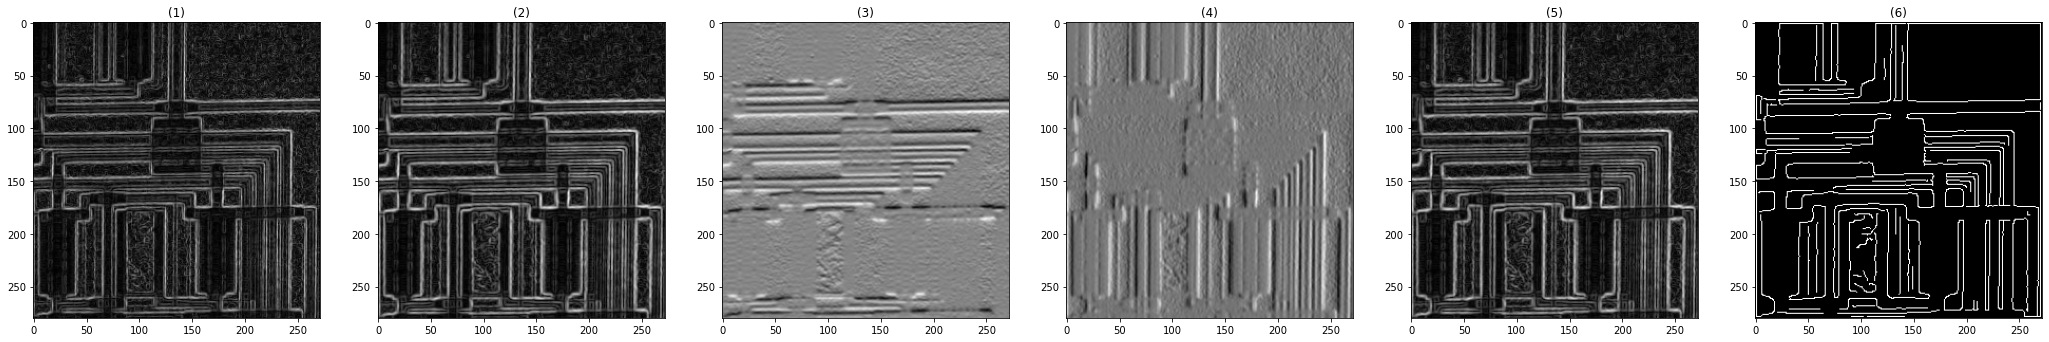

In [61]:
# 1. Built-in Sobel, Prewill, Roberts, Canny
#it is already grayscale

img = io.imread('circuit.jpg')


#roberts ==>high sensitivity to noise, as very  few pixels are used for approximation
roberts_img = roberts(img)

#estimated in eight possible directions so it take much time
Prewitt_img = prewitt(img)

#Sobel ==> it is better than others but affected to noise ratio.
#With the increase in noise the gradient magnitude of the edges also degrades 
#which produces inaccurate results.
sobel_h_img = sobel_h(img)
sobel_v_img = sobel_v(img)
sobel_img = sobel(img)

# High threshold = 1.5 low threshold ==> when we increase the thresholds we will lose some edges
# when we decrease thresholds ==> we will gwt noisy edges
# when we increase the sigma => reduce sensitivity to noise but get more localaization error
# if we increase the low threshold ==> noisy edges to break up
# if we decrease the high threshold ==> unwanted edges
#non maima suppresiion make thin edges
canny_img = canny(img,sigma = 1.5, low_threshold=40, high_threshold=60) 

show_images([roberts_img,Prewitt_img,sobel_h_img,sobel_v_img, sobel_img,canny_img  ])


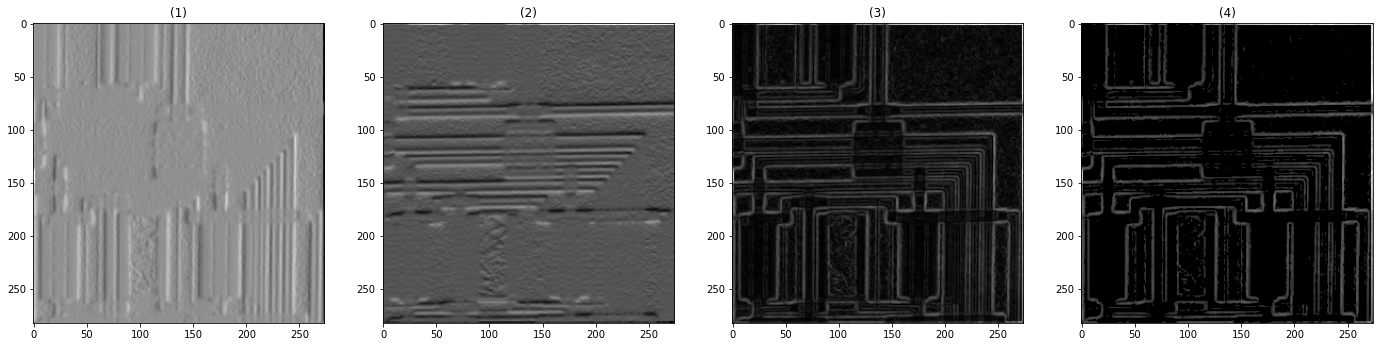

In [62]:
# 2. Custom Sobel (V-H-Both)
# it is existing in the previous one
#sobel is better than prewitt
def brightnessTransformation ( img , threshold):
    img5 = np.copy(img)
    img5[(img5<threshold)] = 0 
    return img5

img = io.imread('circuit.jpg')
f5=np.array([
    [ 1, 0, -1],
    [ 2, 0, -2],
    [ 1, 0, -1]
])

#sobel is better than prewitt
f6=np.array([
    [ 1, 2, 1],
    [ 0, 0, 0],
    [ -1, -2, -1]
])
img_f5 = convolve2d(img,f5)
img_f6 = convolve2d(img,f6)
img_f55 = np.sqrt((img_f5 * img_f5)+(img_f6 * img_f6))

#apply thresholding
#imgg1 = brightnessTransformation(img_f5 , 100 )
#imgg2 =brightnessTransformation(img_f6 , 100 )
#the thresholding here reduce the noise as we removed the pixels < 95
imgg3 =brightnessTransformation(img_f55 , 95 )

show_images([img_f5,img_f6,img_f55 , imgg3  ])


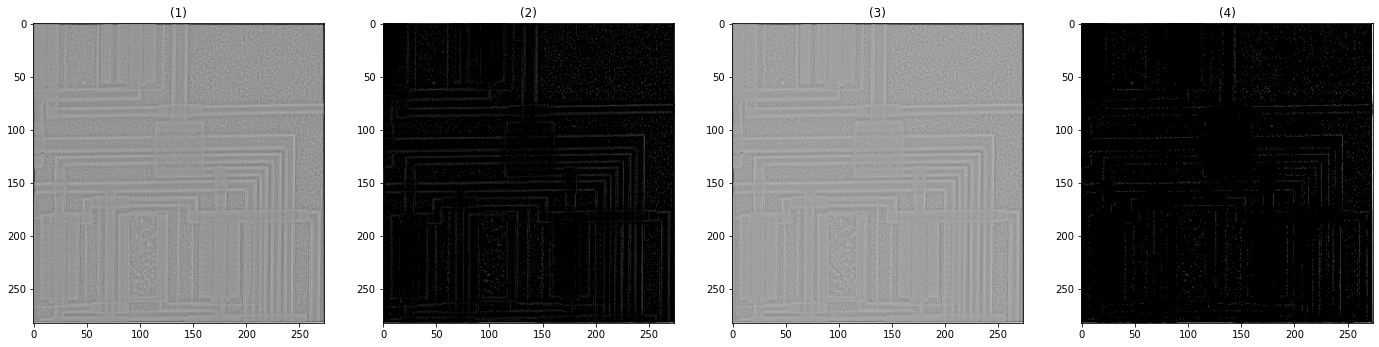

In [63]:
# 3. Custom LoG
thres= 20

img = io.imread('circuit.jpg')

imgg1 =  gaussian(img,sigma=0.2)

f2=np.array([
    [1,1,1],
    [1,-8,1],
    [1,1,1]
])

f3=np.array([
    [0,1,0],
    [1,-4,1],
    [0,1,0]
])

imgg2 = convolve2d(img,f2)
imgg3 = convolve2d(img,f3)
imgg22 =brightnessTransformation(imgg2 , thres )
imgg33 =brightnessTransformation(imgg3 , thres )
#print(imgg2)
#print(imgg3)
#sobel make edges a little thick
#LOG make edges thin as it is a black line between 2 white lines
#zero crossing is more accurate in localizing edges
show_images([imgg2,imgg22,imgg3 , imgg33  ])

In [64]:
'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)
'''

'\nOptional\n1-Make edge detection\n2-Multiply by factor < 1\n3-Subtract (Orginal Image) - (Edge Detection Image)\n'